# Assignment 1: Introductory Tour and Decision Trees

`Group`: PA 1 26

`Date`: Januari 19, 2023

`Group Members`:
- Albin Ekström
- Jonas Nordin



## Task 1: A classification example: fetal heart condition diagnosis

In this task, the assignment was to condition fetal heart diagnosis by using different classifiers and determine which one gives the `best` accuracy.

### Step 1: Reading the data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

DATA_FILE = "data.csv"

# Read the CSV file.
data = pd.read_csv(DATA_FILE, skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [3]:
# Take a peek at the data consisting of 21 numerical features
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


### Step 2: Training the baseline classifier

First, we create a dummy classifier to get a baseline accuracy. Then, to get an idea of how well our simple classifier works, we carry out cross-validation over the training set and compute the classification accuracy on each fold.

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

clf = DummyClassifier(strategy='most_frequent')
cross_val_score(clf, Xtrain, Ytrain)

array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

### Step 3: Trying out some different classifiers

In this step, we try out different classifiers and compare them to find wich gets the best cross-validation score. 

In [5]:
# TREE-BASED CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

rfc = RandomForestClassifier()
rfc_score = cross_val_score(rfc, Xtrain, Ytrain)
print("Random forest score:", rfc_score)

dtc = DecisionTreeClassifier()
dtc_score = cross_val_score(dtc, Xtrain, Ytrain)
print("Decision tree score:", dtc_score)

gbc = GradientBoostingClassifier()
gbc_score = cross_val_score(gbc, Xtrain, Ytrain)
print("Gradient boosting score:", gbc_score)

Random forest score: [0.93529412 0.95588235 0.93529412 0.93529412 0.94117647]
Decision tree score: [0.90294118 0.94411765 0.91176471 0.89705882 0.95      ]
Gradient boosting score: [0.94117647 0.96176471 0.94411765 0.94411765 0.95294118]


In [6]:
# LINEAR CLASSIFIERS
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

per = Perceptron()
per_score = cross_val_score(per, Xtrain, Ytrain)
print("Perceptron score: ", per_score)

lcr = LogisticRegression(max_iter = 40000)
lcr.fit(Xtrain, Ytrain)
# cross_val_score(LR, Xtrain, Ytrain) doesn't work???
lcr_score = lcr.score(Xtest,Ytest)
print("Logistic Regression score: ", lcr_score)

svc = LinearSVC(max_iter=100_000)
svc_score = cross_val_score(svc, Xtrain, Ytrain)
print("Linear SVC score: ", svc_score)

Perceptron score:  [0.84705882 0.88529412 0.82941176 0.85294118 0.71176471]
Logistic Regression score:  0.892018779342723


/Users/jonasnordin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jonasnordin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jonasnordin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jonasnordin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVC score:  [0.87352941 0.86764706 0.86176471 0.87058824 0.88823529]


/Users/jonasnordin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
# NEUTRAL NETWORK CLASSIFIER
from sklearn.neural_network import MLPClassifier

nnc = MLPClassifier(hidden_layer_sizes=(100, 50, 25, 10, ))
nnc_score = cross_val_score(nnc, Xtrain, Ytrain)
print("Neural network score", nnc_score)

Neural network score [0.88823529 0.89411765 0.84705882 0.89705882 0.85294118]


### Step 4: Best performing classifier

Gradient Boost classifier performed best of all classifiers. It works by combining multiple weak models to make a prediction. A sequence of decision trees is generated iteratively where each tree aims to reduce the residual errors made by the previous tree. The final prediction is made by averaging a prediction made (weighted) by the trees. To adjust the weights of each tree and feature, gradient descent is used to minimize the loss function with respect to the model parameters.

In [8]:
from sklearn.metrics import accuracy_score
  
gbc = GradientBoostingClassifier()

gbc.fit(Xtrain, Ytrain)
Yguess = gbc.predict(Xtest)
print("Gradient Boost Classifier score: ", accuracy_score(Ytest, Yguess))

Gradient Boost Classifier score:  0.9295774647887324


## Task 2: Decision trees for classification

In this task, the assignment was to use the premade TreeClassifier from Lecture 1 and find a max depth with good accuracy. Then, after finding a good accuracy a tree should be drawn, but `not` necessarily with the chosen max depth due to visibility. 

### Imported code from lecture 1

In [9]:
import pandas as pd
import numpy as np

class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id


from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [10]:
from sklearn.model_selection import cross_val_score


max_v = 0.5
for i in range(3, 25):
    tcl = TreeClassifier(max_depth=i)
    tcl_score = cross_val_score(tcl, Xtrain, Ytrain)
    tcl_mean = np.mean(tcl_score)
    if float(tcl_mean) > max_v:
        max_v = tcl_mean
        print(f"Tree classifier score (max_depth = {i}):", tcl_mean)

# Best max depth: 13 (score: 0.9135294117647058) 

Tree classifier score (max_depth = 3): 0.9023529411764706
Tree classifier score (max_depth = 4): 0.9105882352941176
Tree classifier score (max_depth = 5): 0.9123529411764706
Tree classifier score (max_depth = 13): 0.9135294117647058


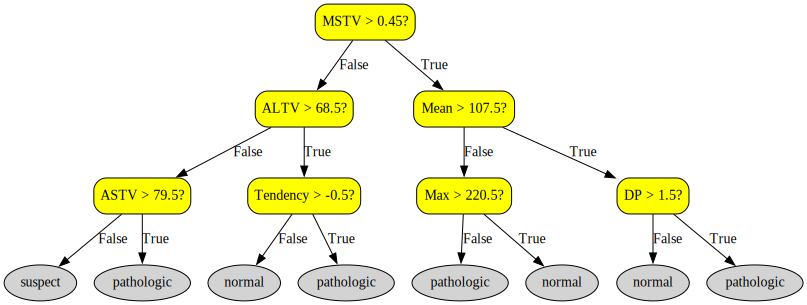

In [11]:
# Draw a tree with max depth 3
tcl = TreeClassifier(max_depth=3)

tcl.fit(Xtrain, Ytrain)
tcl.draw_tree()

## Task 3: A regression example: predicting apartment prices

First, preprocessing of the data from sberbank.csv of apartment prices in Russia was made. Then, select a regression model based on the lowest score (closest to zero). Importing the mean squared error function from Sklearn is used to calculate the score.

In [6]:
import pandas as pd
import numpy as np

# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
# Using a baseline dummy regressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.00278211, 0.00268078, 0.00342607, 0.00148416, 0.00126195]),
 'score_time': array([0.00106692, 0.00062919, 0.00056505, 0.00037909, 0.000453  ]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
  

LR = LinearRegression()
LR.fit(Xtrain, Ytrain)
lr_score = cross_validate(LR, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']
print("Linear regression score: ", lr_score)

R = Ridge()
R.fit(Xtrain, Ytrain)
r_score = cross_validate(R, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']
print("Ridge regression score: ", r_score)

L = Lasso()
L.fit(Xtrain, Ytrain)
l_score = cross_validate(L, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']
print("Linear regression score: ", l_score)

Linear regression score:  [-0.30222063 -0.32537384 -0.29377903 -0.29296258 -0.29265721]
Ridge regression score:  [-0.30222063 -0.32537046 -0.29377831 -0.29296256 -0.29265724]
Linear regression score:  [-0.31042005 -0.29379119 -0.29803599 -0.30061325 -0.30237486]


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

rfc = RandomForestRegressor()
rfc.fit(Xtrain, Ytrain)
rfc_score = cross_validate(rfc, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']
print("Random Forest score: ", rfc_score)

dtc = DecisionTreeRegressor()
dtc.fit(Xtrain, Ytrain)
dtc_score = cross_validate(dtc, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']
print("Decision Tree score: ", dtc_score)

gbc = GradientBoostingRegressor()
gbc.fit(Xtrain, Ytrain)
gbc_score = cross_validate(gbc, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']
print("Gradient boosting score: ", gbc_score)

Random Forest score:  [-0.29312902 -0.27803908 -0.27766253 -0.2810837  -0.28837561]
Decision Tree score:  [-0.53728212 -0.52379181 -0.49924309 -0.51167511 -0.5646694 ]
Gradient boosting score:  [-0.27650388 -0.24920729 -0.26294248 -0.27079364 -0.26330243]


In [14]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor()
MLP.fit(Xtrain, Ytrain)
mlp_score = cross_validate(MLP, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']
print("MLPRegressor score: ", mlp_score)

MLPRegressor score:  [   -7.45699167  -222.77169322    -9.00663714   -19.28751534
 -3943.30408336]


### Gradient Boost Regression
Gradient boost regressor got the `best score of negative-MSE approximately -0.2492 `.

The gradient boost regression algorithm works the same as the classifier algorithm, but with the difference that the target variable is continuous (e.g. predicting a house price on its features). Both methods use gradient descent to minimize the loss function allowing the model to learn from previous mistakes and improve the accuracy of the final predictions. 

## Task 4: Decision trees for regression

In this task a TreeRegressor is implemented and used to predict house prices. 

### Step 1: Implementing the regression model

In [18]:
# Fast version of calculation the varience of a distribution
def fast_var(set):
    n = len(set)
    return sum([x**2 for x in set])/n - (sum(set)**2)/(n**2)

# The function of variance reduction
def variance_reduction(n_low, low_distr, n_high, high_distr):
    total_var = fast_var(np.hstack((low_distr, high_distr)))
    high_term = (n_high*fast_var(high_distr))/(n_low+n_high)
    low_term = (n_low*fast_var(low_distr))/(n_low+n_high)
    return total_var - high_term - low_term

In [19]:
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, RegressorMixin):
    
    def __init__(self, max_depth=10, criterion='variance_reduction'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        elif self.criterion == 'variance_reduction':
                self.criterion_function = variance_reduction
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        mean_value = np.mean(Y)
        return mean_value
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        threshold = 0.1
        return np.var(Y) < threshold
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = []
        high_distr = Y_sorted

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):
            # Update the frequency tables.
            low_distr = Y_sorted[0:i+1]
            high_distr = Y_sorted[i+1:]

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if X_sorted[i] == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point
    

### Step 2: Sanity check

`Hypothesise` would be to have a decision tree of depth `one` because then the data can be separated in a split and the residual error will be small. There's no idea to have more than one in max depth because more splits wouldn't lower the residual error. With a max depth of `zero` the split would make an average of all data points. This would be a good approximation, but give a relatively large residual error compared to max depth of `one`.

In [20]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

Tree regression score:  0.01115020661194649


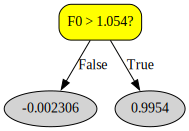

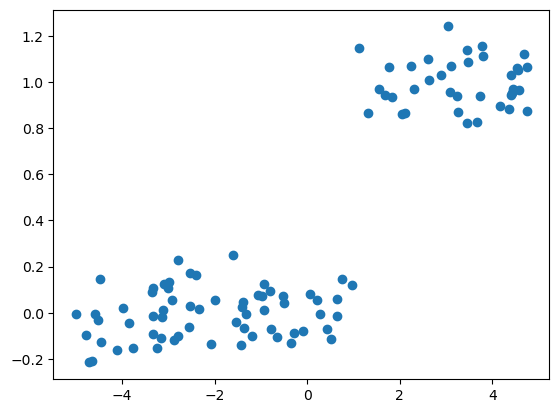

In [21]:
import matplotlib.pyplot as plt

# Train our desicion tree on a small generated dataset
generated_data = make_some_data(100)

plt.scatter(generated_data[0], generated_data[1])

tr = TreeRegressor(max_depth=1)
tr.fit(generated_data[0], generated_data[1])


tr_score = mean_squared_error(generated_data[1], tr.predict(generated_data[0]))
print("Tree regression score: ", tr_score)

tr.draw_tree()



### Step 3: Predicting apartment prices using decision tree regression

In [22]:
tr = TreeRegressor(max_depth=10)
tr.fit(Xtrain, Ytrain)

In [23]:
tr_score = mean_squared_error(Ytest, tr.predict(Xtest))
print("Tree regression score with a max depth of 10: ", tr_score)

Tree regression score with a max depth of 10:  0.31335604177475485


## Step 4

In [25]:
max_depths = range(0,13)
test_scores = []
training_scores = []

for i in max_depths:
    tr = TreeRegressor(max_depth=i)
    tr.fit(Xtrain, Ytrain)

    training_score = mean_squared_error(Ytrain, tr.predict(Xtrain))
    test_score = mean_squared_error(Ytest, tr.predict(Xtest))

    training_scores.append(training_score)
    test_scores.append(test_score)
    
    print(f"Tree regression scored with max depth {i}, training - {training_score}, test - {test_score}")
    

Tree regression scored with max depth 0, training - 0.3891468647585388, test - 0.4028398414133475
Tree regression scored with max depth 1, training - 0.3263543480100574, test - 0.34098250711388134
Tree regression scored with max depth 2, training - 0.30042490282992007, test - 0.3116427403885958
Tree regression scored with max depth 3, training - 0.28927232915183554, test - 0.30188395972140913
Tree regression scored with max depth 4, training - 0.2807451934658121, test - 0.29310031188060437
Tree regression scored with max depth 5, training - 0.2742861310363099, test - 0.2908261342315253
Tree regression scored with max depth 6, training - 0.2667434009364825, test - 0.28643634372540716
Tree regression scored with max depth 7, training - 0.2580975870702128, test - 0.2903456812456766
Tree regression scored with max depth 8, training - 0.24871134720458812, test - 0.29958287041487663
Tree regression scored with max depth 9, training - 0.2399212618132105, test - 0.30619762526665
Tree regressio

`Outcome` from the evaluation score on the `training set` and on the `test set` for different values of `max_depth`:

Tree regression scored with max depth 0,  training - 0.3891468647585388,   test - 0.4028398414133475

Tree regression scored with max depth 1,  training - 0.3263543480100574,   test - 0.34098250711388134

Tree regression scored with max depth 2,  training - 0.30042490282992007,  test - 0.3116427403885958

Tree regression scored with max depth 3,  training - 0.28927232915183554,  test - 0.30188395972140913

Tree regression scored with max depth 4,  training - 0.2807451934658121,   test - 0.29310031188060437

Tree regression scored with max depth 5,  training - 0.2742861310363099,   test - 0.2908261342315253

Tree regression scored with max depth 6,  training - 0.2667434009364825,   test - 0.28643634372540716

Tree regression scored with max depth 7,  training - 0.2580975870702128,   test - 0.2903456812456766

Tree regression scored with max depth 8,  training - 0.24871134720458812,  test - 0.29958287041487663

Tree regression scored with max depth 9,  training - 0.2399212618132105,   test - 0.30619762526665

Tree regression scored with max depth 10, training - 0.22830762290316794, test - 0.31335604177475485

Tree regression scored with max depth 11, training - 0.21575688242870109, test - 0.32121930059606496

Tree regression scored with max depth 12, training - 0.20319241737696103, test - 0.3362578868078887

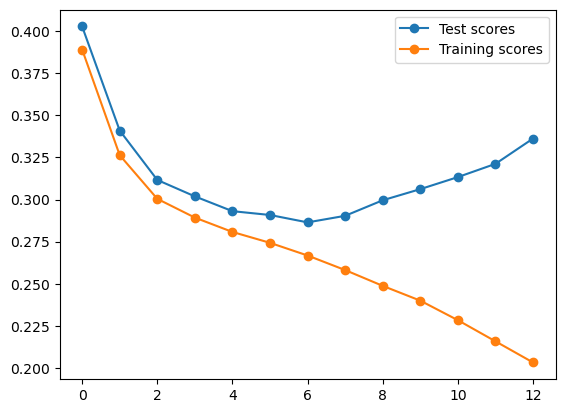

In [26]:
plt.plot(max_depths, test_scores, '-o', label="Test scores")
plt.plot(max_depths, training_scores, '-o', label="Training scores")
plt.legend()
plt.show()

Notice how the two curves start by following each other until the max depth reaches 6. After this point, the test scores start rising while the training score falls even faster. This indicated that the model starts to overfit the data. Therefore the best value to use as a max depth, in this case, would be 6 as this gives us the best score on the test set while not being too overfit to the data.